<a href="https://colab.research.google.com/github/karolinakuligowska/Projektowanie_systemow_informatycznych/blob/main/PSI_2_Zajecia_Zad3_rozwiazanie_BEZ_QDAP__Biden2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wymagane pakiety

In [1]:
install.packages(c("tm", "tidytext", "dplyr", "ggplot2", "wordcloud", "RColorBrewer"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘NLP’, ‘slam’, ‘BH’, ‘janeaustenr’, ‘tokenizers’




In [2]:
library(tm)
library(tidytext)
library(dplyr)
library(ggplot2)
library(wordcloud)
library(RColorBrewer)

Loading required package: NLP


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


Loading required package: RColorBrewer



# Wczytaj dane tekstowe

In [4]:
# Wybierz plik tekstowy
text <- readLines("Biden2024.txt", encoding="UTF-8")

# Przetwarzanie tekstu ----

In [5]:
# Konwersja na ramkę danych
text_df <- data.frame(line = 1:length(text), text = text, stringsAsFactors = FALSE)

# Tokenizacja tekstu (rozbicie na pojedyncze słowa)
tidy_text <- text_df %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words, by = "word")  # Usunięcie stop słów

# Analiza częstości słów ----

In [6]:
# Obliczenie częstości występowania słów
frequent_terms <- tidy_text %>%
  count(word, sort = TRUE)


# Wizualizacja częstości słów ----

Selecting by n


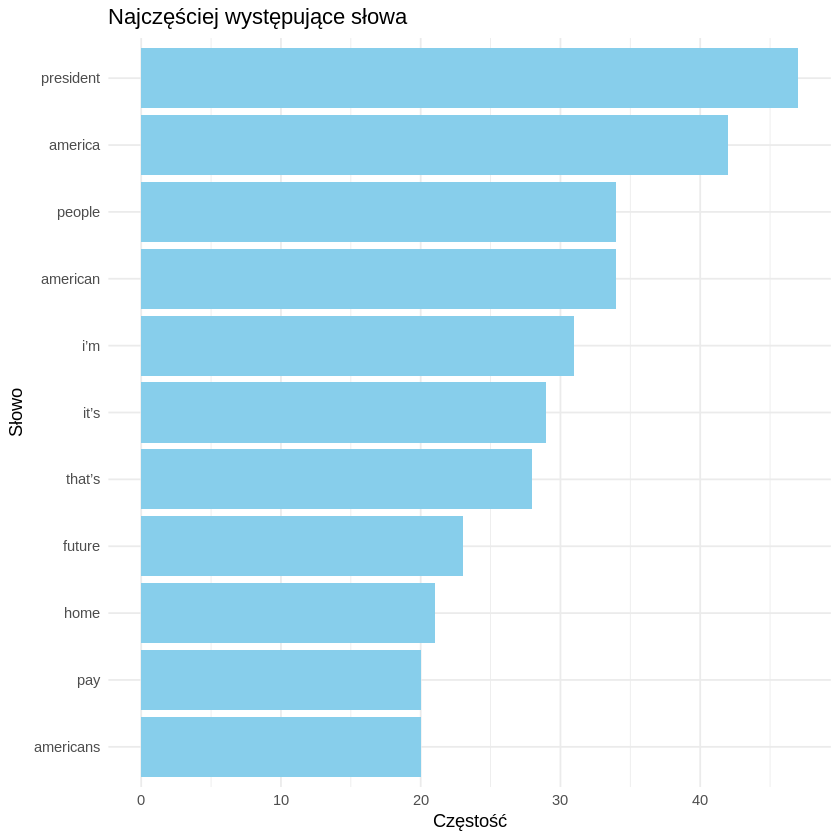

In [7]:
# Wykres słupkowy 10 najczęściej występujących słów
ggplot(frequent_terms %>% top_n(10), aes(x = reorder(word, n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "Słowo", y = "Częstość") +
  coord_flip() +
  theme_minimal() +
  ggtitle("Najczęściej występujące słowa")

# Tworzenie chmury słów ----

Warning message in wordcloud(words = frequent_terms$word, freq = frequent_terms$n):
“president could not be fit on page. It will not be plotted.”


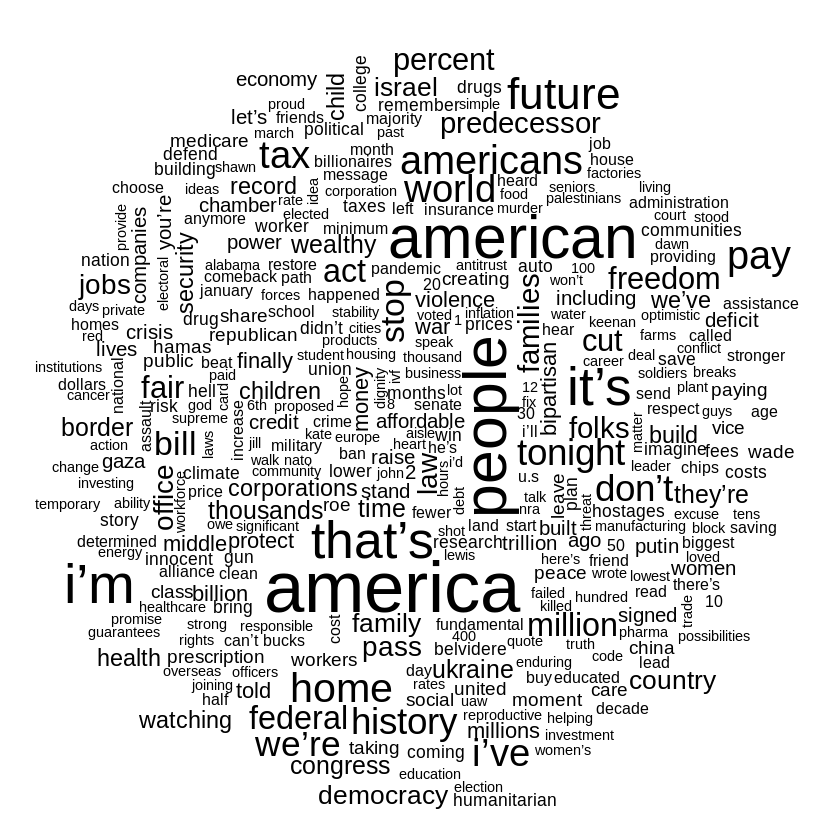

In [8]:
# Chmura słów z domyślnymi parametrami
wordcloud(words = frequent_terms$word, freq = frequent_terms$n)

# Opcje chmury słów ----

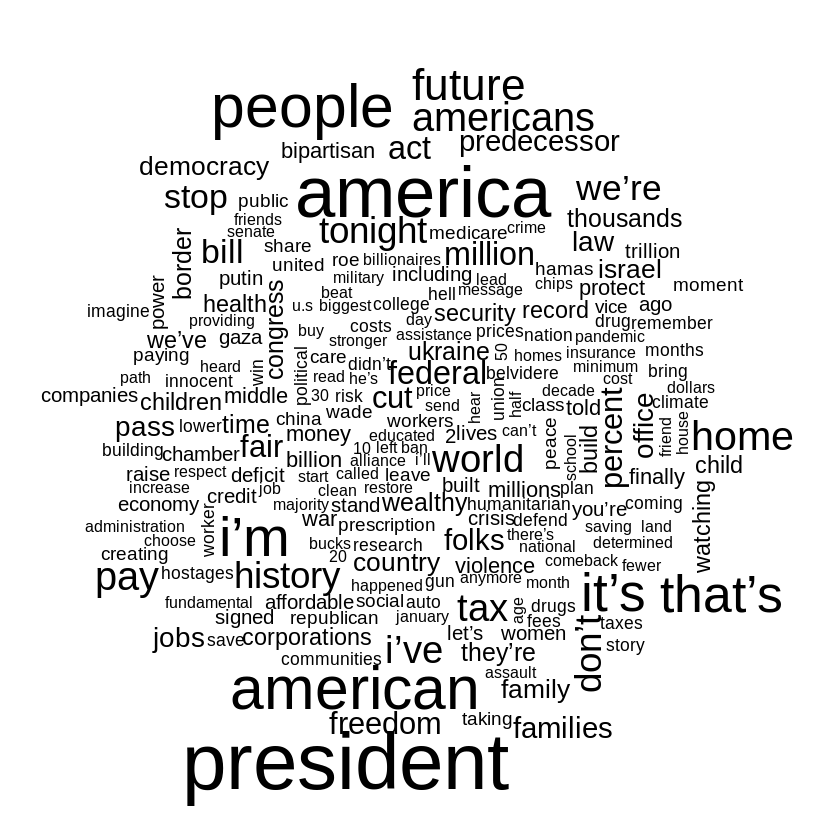

In [9]:
# Ograniczenie liczby słów w chmurze poprzez określenie minimalnej częstości
wordcloud(words = frequent_terms$word, freq = frequent_terms$n, min.freq = 4)

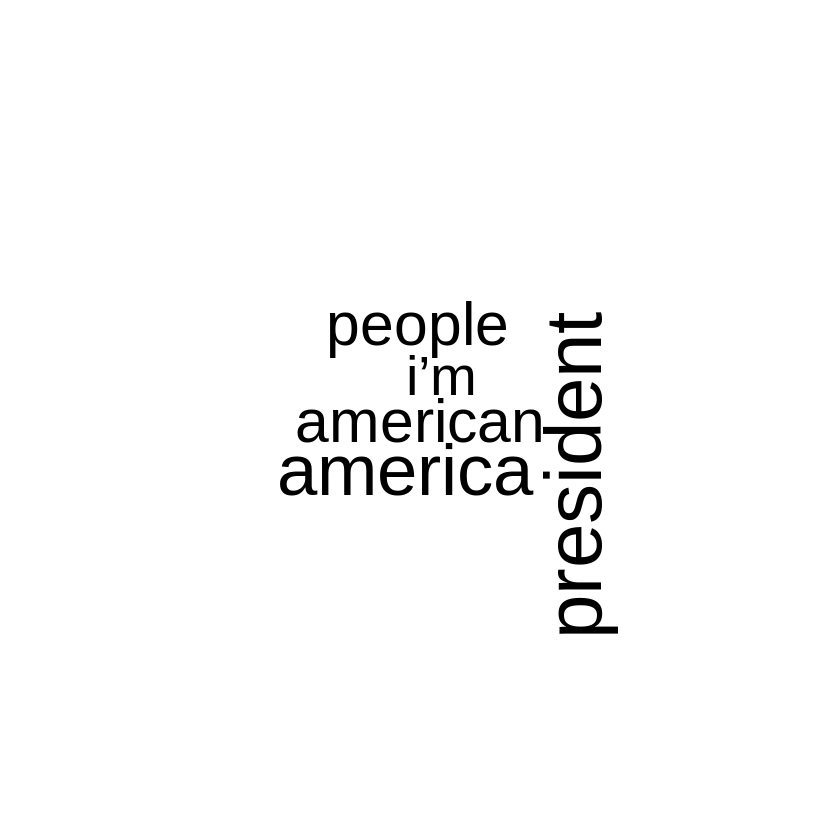

In [10]:
# Ograniczenie liczby słów w chmurze poprzez określenie maksymalnej liczby słów
wordcloud(words = frequent_terms$word, freq = frequent_terms$n, max.words = 5)

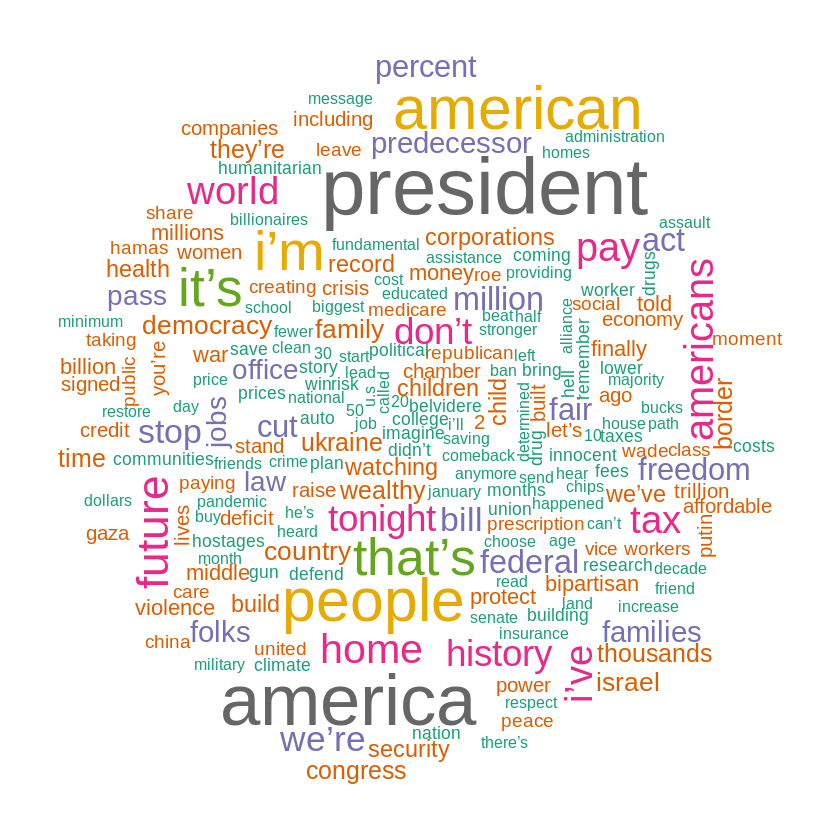

In [11]:
# Dodanie koloru do chmury słów
wordcloud(words = frequent_terms$word, freq = frequent_terms$n, min.freq = 4, colors = brewer.pal(8, "Dark2"))

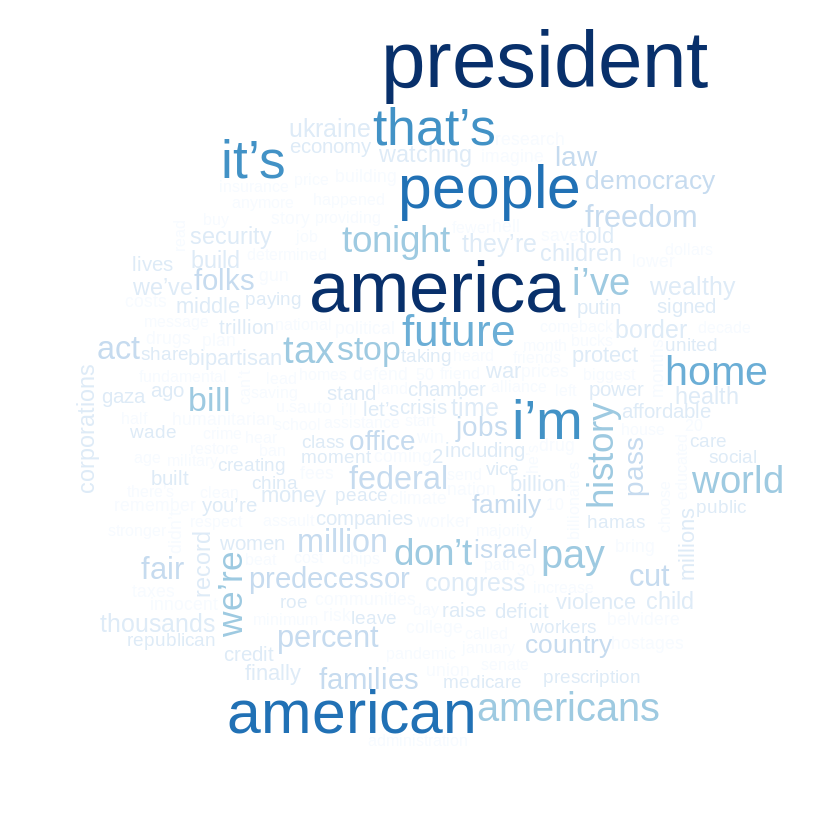

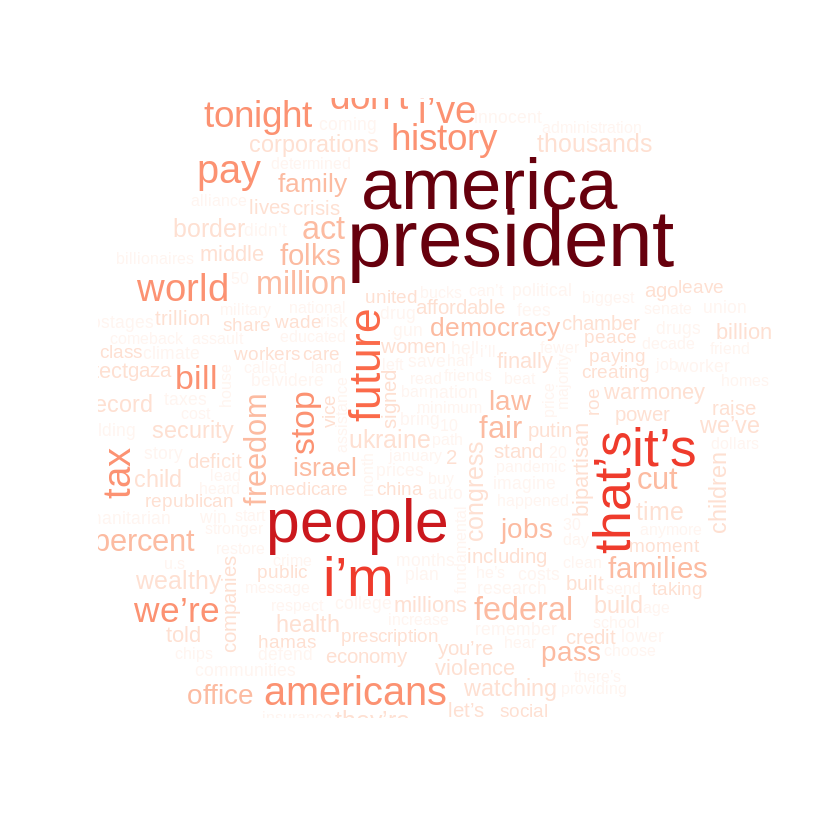

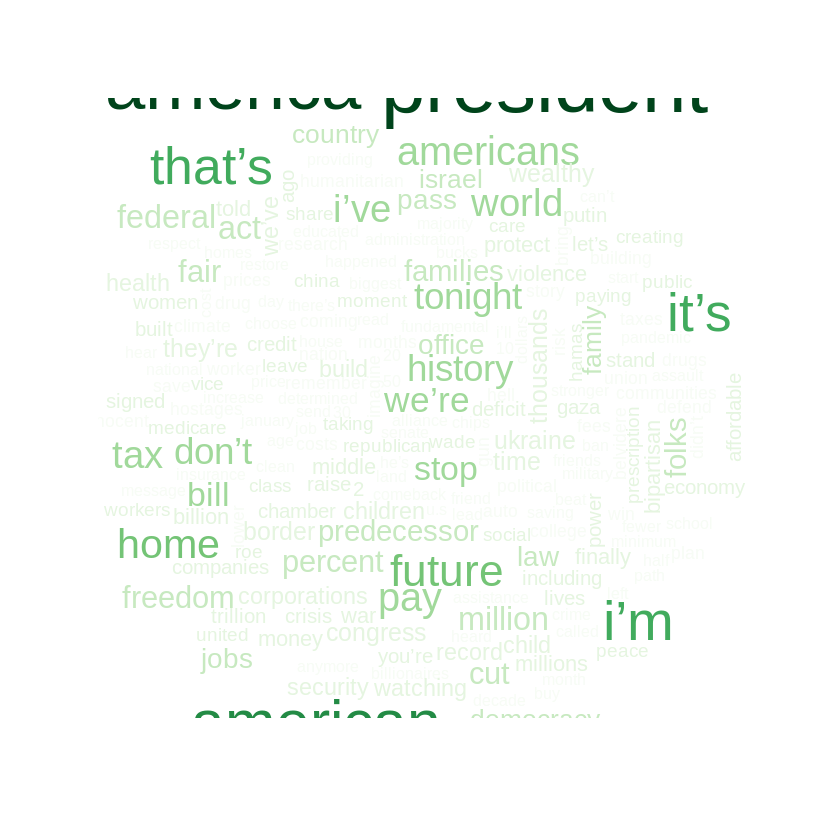

In [12]:
# Dodanie różnych palet kolorystycznych
wordcloud(words = frequent_terms$word, freq = frequent_terms$n, min.freq = 4, colors = brewer.pal(9, "Blues"))
wordcloud(words = frequent_terms$word, freq = frequent_terms$n, min.freq = 4, colors = brewer.pal(9, "Reds"))
wordcloud(words = frequent_terms$word, freq = frequent_terms$n, min.freq = 4, colors = brewer.pal(9, "Greens"))
